The script is used to analyze the parameter sensitivity with use of the PCEs

In [177]:
# import packages
import numpy as np
import pandas as pd
import pickle
import pyapprox as pya

In [178]:
# define the function for adaptive pce
vs_list = []
from run_source import run_source_lsq, run_source_annual
from funcs.read_data import variables_prep, file_settings
from funcs.utils import return_sa

## calculate senstivity indices

In [53]:
# load parameters
parameters = pd.read_csv(f'{file_sesttings()[1]}Parameters-PCE.csv')['Name_short'].values
for year in range(2009, 2018):
    sa = return_sa(year, parameters)
    sa.to_csv(f'{file_settings()[0]}sa_{year}.csv', index = 'Name_short')

C:\Users\qianw\anaconda3\envs\oed\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


## Create dotty plots

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc("text", usetex=False)

In [8]:
# import PCE
year = 'sse'
emulator = pickle.load(open(f'{file_settings()[0]}pce-{year}-level4.pkl', 'rb'))

In [154]:
# generate random samples and calculated the corresponding SSEs
param_file = file_settings()[-1]
ind_vars, variable = variables_prep(param_file, product_uniform='uniform', dummy=False)
param_names =  pd.read_csv(f'{file_settings()[0]}{param_file}')['Name_short'].values
dot_samples = pya.generate_independent_random_samples(variable, 1e6)

In [155]:
dot_vals = emulator.pce(dot_samples)

In [156]:
index_opt = np.where((dot_vals.flatten() >= 0) & (dot_vals.flatten() <= 5e11))
samples_opt = dot_samples[:, index_opt[0]]
vals_opt = dot_vals[index_opt]

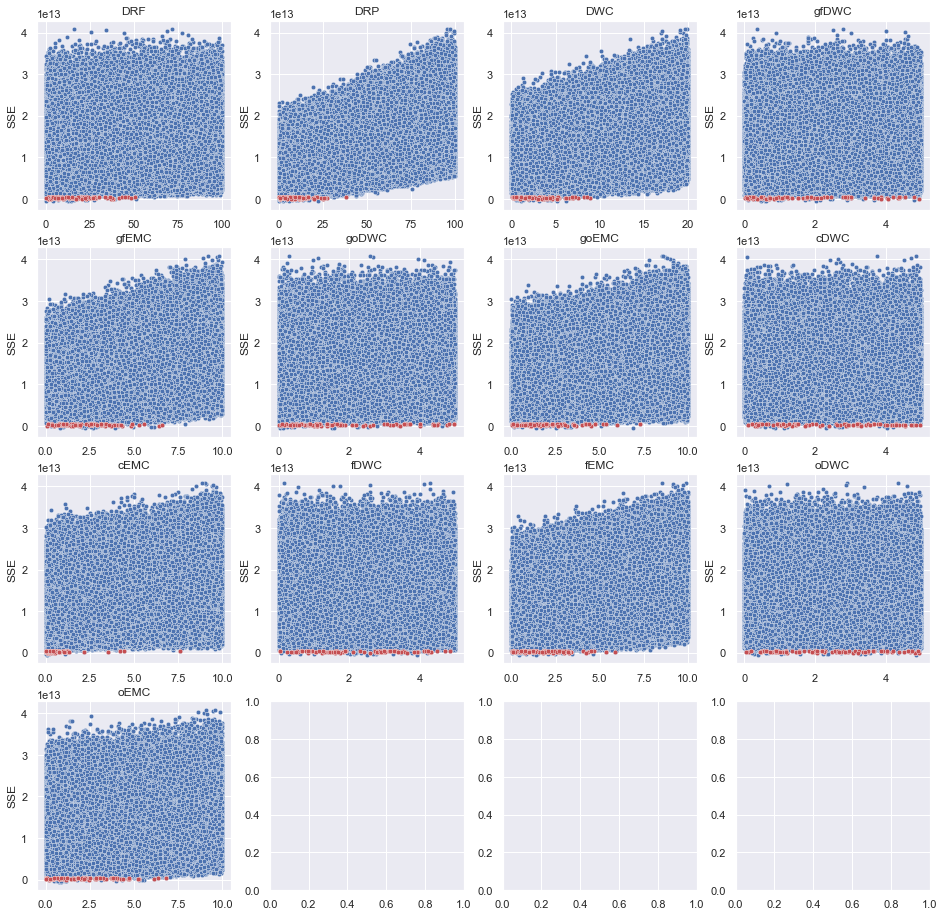

In [175]:
# plot the two-dimension or three-dimension dotty plots
fig, axes = plt.subplots(4, 4, figsize = (16, 16))
sns.set(font_scale=1)
for ii in range(dot_samples.shape[0]): 
    ax = sns.scatterplot(x=dot_samples[ii, :], y=dot_vals.flatten(), ax=axes[ii // 4, ii % 4], s=20)
    ax = sns.scatterplot(x=samples_opt[ii, :], y=vals_opt.flatten(), ax=axes[ii // 4, ii % 4], color='r', s=20)
    ax.set_title(param_names[ii])
    ax.set_ylabel('SSE')
plt.savefig(f'{file_settings()[0]}figs/sse_scatters-1D.png', format='png', dpi=300)

In [184]:
# import the sensitivity of parameters
parameters = pd.read_csv(f'{file_settings()[1]}Parameters-PCE.csv')['Name_short'].values
sa = return_sa(year, parameters)
sa = sa.sort_values(by='total_effects')

C:\Users\qianw\anaconda3\envs\oed\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [185]:
# fix parameters and replot the scatters
fixed_values = 
for ii in range(sa.shape[0]):
    sa.iloc

,main_effects,total_effects
oDWC,0.000248,0.000248
fDWC,0.000261,0.000261
cDWC,0.000330,0.000330
gfDWC,0.000860,0.000860
goDWC,0.000945,0.000945
DRF,0.007852,0.007852
oEMC,0.022712,0.024705
cEMC,0.064906,0.068347
goEMC,0.095711,0.102684
fEMC,0.099463,0.104952
